### Ejercicio regresión logística

#### El objetivo es clasificar con un modelo de regresión logística los datos obtenidos a partir de una simulación no lineal que se encuentran en el fichero "ejemplo_dataset".

#### Cargamos las librerías necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split


#### Creamos y visualizamos el set de datos

In [2]:
# Datos
# ==============================================================================
df = pd.read_csv("ejemplo_dataset.csv")
df.head()


,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


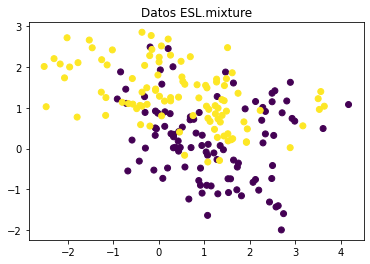

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df.X1, df.X2, c=df.y);
ax.set_title("Datos ESL.mixture");

#### Dividimos los datos en el set de entrenamiento y de test.

In [4]:
X = df[["X1", "X2"]]

X.to_numpy().reshape(-1,2)

array([[ 2.52609297,  0.32105045],
       [ 0.36695447,  0.0314621 ],
       [ 0.76821908,  0.71748617],
       [ 0.69343568,  0.77719403],
       [-0.01983662,  0.86725374],
       [ 2.19654493, -1.02301406],
       [-0.10915916, -0.53062108],
       [-0.91262006,  1.21621638],
       [ 2.49984265, -0.4182779 ],
       [ 1.89770911,  0.9737555 ],
       [-0.29536235,  0.00967317],
       [-0.68159574, -0.55165028],
       [ 2.49097871,  1.14831528],
       [-0.0534306 ,  0.48410246],
       [ 0.68761759,  0.70500482],
       [ 1.27955952, -0.27103329],
       [-0.31300748,  1.27374731],
       [ 2.81303861,  1.16775971],
       [ 0.31998815,  0.01720165],
       [ 0.43754238,  0.41364801],
       [ 2.43293936, -1.31436313],
       [-0.42964958, -0.30981122],
       [ 0.2487284 ,  0.85551988],
       [ 2.6939368 , -1.9998534 ],
       [ 1.46710925,  1.87759072],
       [ 1.04069734, -0.08518757],
       [ 0.03331846,  1.93025749],
       [ 1.72568143, -0.45595914],
       [ 1.14948071,

In [5]:
y = df["y"].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [6]:
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

#### Creamos y entrenamos el modelo de regresión logística.

Importamos la clase LogisticRegression

In [7]:
model = LogisticRegression ()

In [8]:
model.fit(x_train, y_train)

LogisticRegression()

#### Clasificamos con el algoritmo entrenado los datos de test.

In [9]:
y_predicted = model.predict (x_test)

#### Calculamos la matriz de confusión

In [10]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [24]:
y_predicted

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [12]:
conf_matrix = metrics.confusion_matrix (y_test, y_predicted)

conf_matrix

array([[15,  6],
       [ 5, 14]], dtype=int64)

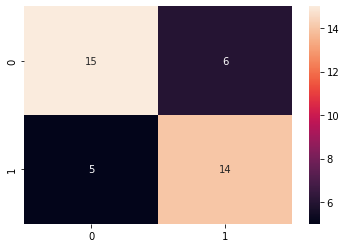

In [13]:
f = sns.heatmap(conf_matrix, annot=True, fmt='d')

Si nos fijamos en la diagonal de la matriz, para la predicción "0" el algoritmo ha predicho el output correctamente 15 veces y ha fallado 6. Para la predicción "1", ha predicho el output correctamente 14 veces y ha fallado 5.